In [372]:

from sklearn.preprocessing import MinMaxScaler
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
plt.style.use('ggplot')

In [330]:
df2 = pd.read_csv('Weekly_U.S._Product_Supplied_of_Petroleum_Products.csv')
wdf = pd.read_csv('US_confirmed_weekly.csv')

In [340]:
df2 = df2[(df2['Week of'] >= '2020-01-24') & (df2['Week of'] <= '2021-04-09')]

In [128]:
jet_df2 = pd.read_csv('jet_data.csv')

In [337]:
df2 = df2.sort_values('Week of')

In [338]:
jet_df2 = pd.read_csv('jet_data.csv')
wdf = pd.read_csv('US_confirmed_weekly.csv')

In [264]:
df2 = df2[(df2['Week of'] >= '2020-01-01') & (jet_df2['Week of'] <= '2020-07-01')]

In [265]:
wdf = wdf[(wdf['Date'] >= '2020-01-01') & (wdf['Date'] <= '2020-07-01')]

**Linear Regression to find the imapct of covid-19 on weekly supplied petroleum products**




In [365]:
y = np.array(df2['Weekly U.S. Product Supplied of Petroleum Products Thousand Barrels per Day'].values).reshape(-1,1)
x1 = np.array(jet_df2['Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel Thousand Barrels per Day'].values).reshape(-1,1)
x2 = np.array(wdf['All states'].values).reshape(-1,1)


In [371]:
x_with_constant = np.ones_like(x1).reshape(-1,1)
x_with_constant = np.concatenate([x_with_constant, x1], axis=1)
# x_with_constant
# x_with_constant2 = np.ones_like(x2).reshape(-1,1)
x_with_constant = np.concatenate([x_with_constant, x2], axis=1)

In [369]:
def regression(X, y):
    betas = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    return betas
betas = regression(x_with_constant, y)
print('betas', betas)
# calculating predicted y
y_pred = betas[0] + betas[1] * x1 + betas[2] * x2
print( 'value is ', y)
print('prediction is', y_pred)
y_true, y_pred = np.array(y), np.array(y_pred)
        # MSE Error for MLR
mean_squared_error = np.mean(np.square(y_true/np.linalg.norm(y_true) - y_pred/np.linalg.norm(y_pred)))
print('mean_squared_error', mean_squared_error)


betas [[1.36291344e+04]
 [4.36450610e+00]
 [2.99589512e-03]]
value is  [[19598]
 [20810]
 [20965]
 [19602]
 [19870]
 [21265]
 [21875]
 [21456]
 [19420]
 [17852]
 [14437]
 [13797]
 [14103]
 [15763]
 [15354]
 [16814]
 [16586]
 [15958]
 [15066]
 [17573]
 [17290]
 [18348]
 [17353]
 [18120]
 [18480]
 [17654]
 [19094]
 [17912]
 [19369]
 [17159]
 [19619]
 [16979]
 [18678]
 [17027]
 [18439]
 [17447]
 [18345]
 [19475]
 [18112]
 [19631]
 [18362]
 [20180]
 [19564]
 [19156]
 [18468]
 [18534]
 [19335]
 [19088]
 [19317]
 [17054]
 [19607]
 [19642]
 [19681]
 [18528]
 [20183]
 [20668]
 [18688]
 [18759]
 [18672]
 [18933]
 [18702]
 [20313]
 [19236]
 [20328]]
prediction is [[20917.86159857]
 [20861.12358989]
 [20891.67384865]
 [19665.2472061 ]
 [19957.66997088]
 [21079.34889497]
 [20459.67548151]
 [21202.44484667]
 [20030.34140621]
 [19491.46241104]
 [16999.00492432]
 [15743.25967631]
 [16386.76697968]
 [17207.4760204 ]
 [15960.87236465]
 [15242.2929729 ]
 [16463.5503273 ]
 [17449.65907571]
 [15372.597478

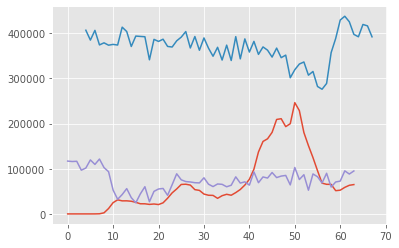

In [370]:
plt.plot(wdf['All states'])
plt.plot(df2['Weekly U.S. Product Supplied of Petroleum Products Thousand Barrels per Day']*20)
plt.plot(jet_df2['Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel Thousand Barrels per Day']*70)